<a href="https://colab.research.google.com/github/Sathvik-Chowdary-Veerapaneni/AI-health-report-generator/blob/Data_Cycle/EDA_and_DataModfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# directory = 'Eelctronic_Helath_Records/'


# file_paths = glob.glob(os.path.join(directory, '*.csv.gz'))

Loading csv gz files into df's

In [3]:
# admissions_df   =   pd.read_csv(directory+'admissions.csv.gz')
# diagnoses_df    =   pd.read_csv(directory+'diagnoses_icd.csv.gz')
# labevents_df    =   pd.read_csv(directory+'labevents.csv.gz')
# patients_df     =   pd.read_csv(directory+'patients.csv.gz')
# prescriptions_df=   pd.read_csv(directory+'prescriptions.csv.gz')
# procedures_icd_df=  pd.read_csv(directory+'procedures_icd.csv.gz')

In [4]:

admissions_df   =   pd.read_csv('admissions.csv')
diagnoses_df    =   pd.read_csv('diagnoses_icd.csv')
labevents_df    =   pd.read_csv('labevents.csv')
patients_df     =   pd.read_csv('patients.csv')
prescriptions_df=   pd.read_csv('prescriptions.csv')
procedures_icd_df=  pd.read_csv('procedures_icd.csv')


In [5]:
admissions_df.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [6]:
diagnoses_df.head(5)

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


In [7]:
labevents_df.head(5)

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,172061,10014354,29600294.0,1808066,51277,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
1,172062,10014354,29600294.0,1808066,51279,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,3.35,3.35,m/uL,4.6,6.1,abnormal,ROUTINE,NaN
2,172068,10014354,29600294.0,1808066,52172,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,49.7,49.70,fL,35.1,46.3,abnormal,ROUTINE,NaN
3,172063,10014354,29600294.0,1808066,51301,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,20.3,20.30,K/uL,4.0,10.0,abnormal,ROUTINE,NaN
4,172050,10014354,29600294.0,1808066,51249,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,31.1,31.10,g/dL,32.0,37.0,abnormal,ROUTINE,NaN


In [8]:
patients_df.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


In [9]:
prescriptions_df.head(5)


,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10027602,28166872,27168639,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10027602,28166872,40720238,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10027602,28166872,62845687,NaN,NaN,NaN,2201-10-31 12:00:00,NaN,MAIN,Lorazepam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,28166872,24340150,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10027602,28166872,14435820,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
procedures_icd_df.head(5)

,subject_id,hadm_id,seq_num,chartdate,icd_code,icd_version
0,10011398,27505812,3,2146-12-15,3961,9
1,10011398,27505812,2,2146-12-15,3615,9
2,10011398,27505812,1,2146-12-15,3614,9
3,10014729,23300884,4,2125-03-23,3897,9
4,10014729,23300884,1,2125-03-20,3403,9


- all the csv.gz files are loaded into respectiev dataframes

Identifying the columns in each dataframes

In [11]:
df_list = [admissions_df, diagnoses_df, labevents_df, patients_df, prescriptions_df, procedures_icd_df]

## All the columns from respective dataframes

In [ ]:
for df in df_list:
  print(df.columns)
  print('\n\n')

## Data Exploration

In [14]:
admissions_df.shape

(275, 16)

In [15]:
diagnoses_df.shape

(4506, 5)

In [16]:
labevents_df.shape

(107727, 16)

In [18]:
patients_df.shape

(100, 6)

In [19]:
prescriptions_df.shape

(18087, 21)

In [20]:
procedures_icd_df.shape

(722, 6)

## Intial Insights Summary
1. Initial Insights Summary for Colab Markdown
Dataset Scale: The dataset includes 100 patients with 275 admissions, averaging 2.75 admissions per patient, indicating frequent hospital visits.

2. Data Density: Admissions average 16 diagnoses, 392 lab tests, 66 prescriptions, and 2.6 procedures, highlighting extensive medical activity per visit.

3. Focus Areas: High lab test and prescription volumes suggest summarizing key results and medications will be valuable for doctors' reports.

## admissions_df deep dive

In [21]:
print(admissions_df['subject_id'].nunique())  # Should match patients_df rows
print(diagnoses_df['hadm_id'].nunique())     # Should match admissions_df rows

100
275


In [22]:
print(admissions_df.isnull().sum())

subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64


In [28]:
admissions_df['admission_type'].value_counts()

,count
admission_type,
EW EMER.,104
OBSERVATION ADMIT,45
URGENT,38
EU OBSERVATION,30
SURGICAL SAME DAY ADMISSION,18
DIRECT EMER.,15
ELECTIVE,13
DIRECT OBSERVATION,7
AMBULATORY OBSERVATION,5


In [26]:
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'])

In [27]:
admissions_df.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [29]:
admissions_df['LOS'] = (admissions_df['dischtime'] - admissions_df['admittime']).dt.days

In [30]:
admissions_df.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,LOS
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0,8
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0,7
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0,5
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0,2


In [31]:
print(admissions_df['LOS'].describe())

count    275.000000
mean       6.327273
std        6.745246
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       44.000000
Name: LOS, dtype: float64


In [32]:
admissions_df['discharge_location'].value_counts()

,count
discharge_location,
HOME HEALTH CARE,76
HOME,72
SKILLED NURSING FACILITY,36
DIED,15
REHAB,13
CHRONIC/LONG TERM ACUTE CARE,9
HOSPICE,5
AGAINST ADVICE,4
PSYCH FACILITY,2


In [33]:
admissions_df = admissions_df.sort_values(by=['subject_id', 'admittime'])

In [34]:
admissions_df.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,LOS
18,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,0
103,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,1
105,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2
104,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,1
65,10001217,24597018,2157-11-18 22:56:00,2157-11-25 18:00:00,NaN,EW EMER.,P4645A,EMERGENCY ROOM,HOME HEALTH CARE,Other,?,MARRIED,WHITE,2157-11-18 17:38:00,2157-11-19 01:24:00,0,6


In [35]:
admissions_df['time_between_admissions'] = admissions_df.groupby('subject_id')['admittime'].diff().dt.days

In [36]:
admissions_df['readmission_30'] = admissions_df['time_between_admissions'] <= 30
print(admissions_df['readmission_30'].sum())

46


In [39]:
admissions_df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,LOS,time_between_admissions,readmission_30
18,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,0,NaN,False
103,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,1,50.0,False
105,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2,26.0,True
104,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,1,13.0,True
65,10001217,24597018,2157-11-18 22:56:00,2157-11-25 18:00:00,NaN,EW EMER.,P4645A,EMERGENCY ROOM,HOME HEALTH CARE,Other,?,MARRIED,WHITE,2157-11-18 17:38:00,2157-11-19 01:24:00,0,6,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,10040025,22251969,2147-08-03 02:58:00,2147-08-06 16:50:00,NaN,OBSERVATION ADMIT,P85BWS,EMERGENCY ROOM,HOME,Other,ENGLISH,DIVORCED,WHITE,2147-08-02 18:14:00,2147-08-03 02:41:00,0,3,47.0,False
138,10040025,27876215,2147-11-09 08:02:00,2147-11-14 18:53:00,NaN,EW EMER.,P059D0,EMERGENCY ROOM,SKILLED NURSING FACILITY,Other,ENGLISH,DIVORCED,WHITE,2147-11-09 04:17:00,2147-11-09 10:56:00,0,5,98.0,False
238,10040025,27259207,2147-12-04 20:48:00,2147-12-18 16:43:00,NaN,OBSERVATION ADMIT,P43BTJ,EMERGENCY ROOM,SKILLED NURSING FACILITY,Other,ENGLISH,DIVORCED,WHITE,2147-12-04 13:11:00,2147-12-05 02:28:00,0,13,25.0,True
50,10040025,25933959,2147-12-29 19:36:00,2148-01-09 17:38:00,NaN,ELECTIVE,P43BTJ,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Other,ENGLISH,DIVORCED,WHITE,NaN,NaN,0,10,24.0,True


**Key Insights**
1. **Readmission Patterns:** The readmission_30 flag highlights critical healthcare quality metrics. For subject_id 10000032, two admissions (hadm_id 29079034 and 25742920) were within 30 days of prior discharges, indicating potential health or care issues.

2. **Patient Diversity:** Demographics vary, with insurance types like Other and Medicaid, languages like ENGLISH, and marital statuses like WIDOWED and DIVORCED.

3. **Admission Frequency:** Some patients, like subject_id 10040025, have multiple admissions (e.g., 4 shown), with LOS ranging from 3 to 13 days.



## Exploring Further in admissions_df

In [40]:
# Ensure datetime columns are properly formatted (adjust as needed)
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'])
admissions_df['edregtime'] = pd.to_datetime(admissions_df['edregtime'], errors='coerce')
admissions_df['edouttime'] = pd.to_datetime(admissions_df['edouttime'], errors='coerce')

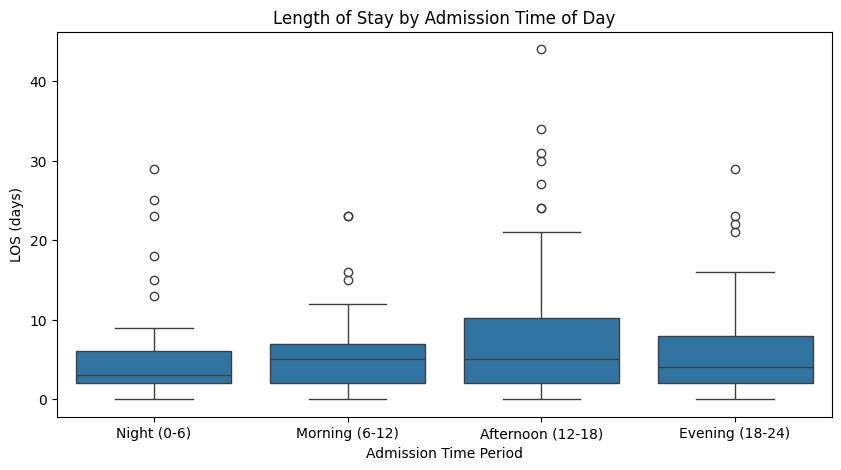

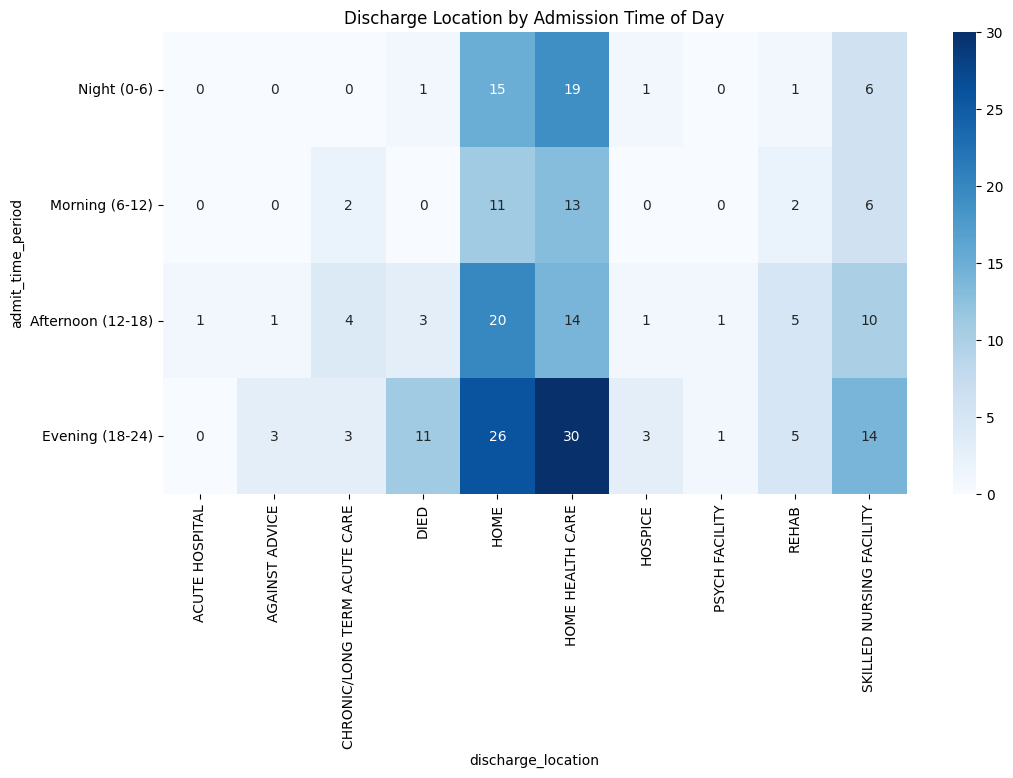

In [42]:
# Let’s see if the hour of admission impacts LOS or discharge outcomes.

# Extract hour of admission
admissions_df['admit_hour'] = admissions_df['admittime'].dt.hour

# Categorize into time periods
bins = [0, 6, 12, 18, 24]
labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
admissions_df['admit_time_period'] = pd.cut(admissions_df['admit_hour'], bins=bins, labels=labels, right=False)

# Plot LOS by admission time period
plt.figure(figsize=(10, 5))
sns.boxplot(data=admissions_df, x='admit_time_period', y='LOS')
plt.title('Length of Stay by Admission Time of Day')
plt.xlabel('Admission Time Period')
plt.ylabel('LOS (days)')
plt.show()

# Discharge location by admission time
cross_tab = pd.crosstab(admissions_df['admit_time_period'], admissions_df['discharge_location'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')
plt.title('Discharge Location by Admission Time of Day')
plt.show()


In [43]:
# Let’s explore how ED usage ties into admission type sequences for patients with multiple visits.

# Flag ED usage
admissions_df['used_ed'] = ~admissions_df['edregtime'].isna()

# Get patients with multiple admissions
multi_admit_patients = admissions_df['subject_id'].value_counts()[admissions_df['subject_id'].value_counts() > 1].index
multi_admit_df = admissions_df[admissions_df['subject_id'].isin(multi_admit_patients)].sort_values(['subject_id', 'admittime'])

# Analyze ED usage and admission type sequence for a sample
for patient in multi_admit_patients[:3]:  # First 3 patients
    patient_data = multi_admit_df[multi_admit_df['subject_id'] == patient]
    ed_sequence = patient_data['used_ed'].tolist()
    admit_types = patient_data['admission_type'].tolist()
    print(f"Patient {patient}: ED Usage {ed_sequence}, Admission Types {admit_types}")

Patient 10014354: ED Usage [True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True], Admission Types ['EW EMER.', 'EU OBSERVATION', 'URGENT', 'EU OBSERVATION', 'EU OBSERVATION', 'EW EMER.', 'OBSERVATION ADMIT', 'OBSERVATION ADMIT', 'OBSERVATION ADMIT', 'URGENT', 'DIRECT EMER.', 'OBSERVATION ADMIT', 'OBSERVATION ADMIT', 'EU OBSERVATION', 'EU OBSERVATION', 'EU OBSERVATION', 'OBSERVATION ADMIT', 'EW EMER.', 'OBSERVATION ADMIT', 'EW EMER.']
Patient 10015860: ED Usage [True, True, True, False, True, True, True, True, True, True, True, True, True], Admission Types ['EW EMER.', 'EW EMER.', 'EU OBSERVATION', 'DIRECT EMER.', 'EW EMER.', 'EW EMER.', 'EU OBSERVATION', 'OBSERVATION ADMIT', 'EW EMER.', 'OBSERVATION ADMIT', 'URGENT', 'EU OBSERVATION', 'OBSERVATION ADMIT']
Patient 10002930: ED Usage [True, True, True, True, False, True, True, False, True, True, True, True], Admission Types ['EU OBSERVATION', 'DIRECT EMER.', 'EW EMER.',

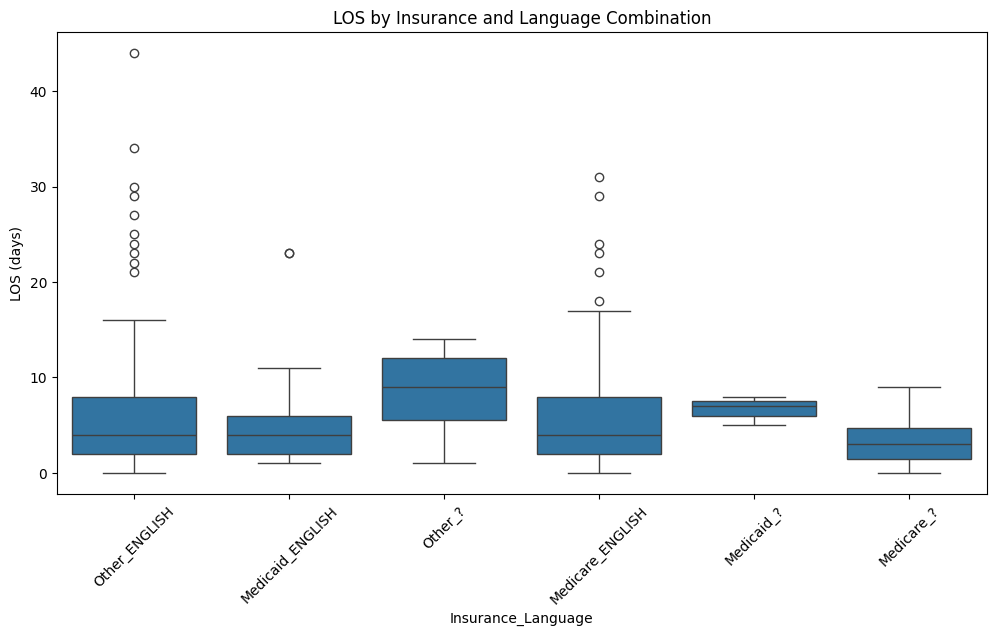

In [45]:
# Let’s investigate how insurance and language together affect LOS.

# Create a combined demographic column
admissions_df['insurance_language'] = admissions_df['insurance'] + "_" + admissions_df['language']

# Filter to top combinations for clarity
top_combinations = admissions_df['insurance_language'].value_counts().head(10).index
filtered_df = admissions_df[admissions_df['insurance_language'].isin(top_combinations)]

# Plot LOS by insurance-language combo
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='insurance_language', y='LOS')
plt.title('LOS by Insurance and Language Combination')
plt.xlabel('Insurance_Language')
plt.ylabel('LOS (days)')
plt.xticks(rotation=45)
plt.show()

Patient 10014354 Discharge Locations: ['HOME HEALTH CARE', nan, 'HOME HEALTH CARE', nan, nan, 'HOME HEALTH CARE', 'HOME HEALTH CARE', 'HOME HEALTH CARE', 'HOME', 'HOME HEALTH CARE', 'HOME HEALTH CARE', 'AGAINST ADVICE', 'HOME HEALTH CARE', nan, nan, nan, 'AGAINST ADVICE', 'HOME HEALTH CARE', 'HOME HEALTH CARE', 'HOME HEALTH CARE']
Patient 10015860 Discharge Locations: ['REHAB', 'HOME HEALTH CARE', nan, 'HOME HEALTH CARE', 'HOME HEALTH CARE', 'HOME HEALTH CARE', nan, 'SKILLED NURSING FACILITY', 'SKILLED NURSING FACILITY', 'SKILLED NURSING FACILITY', 'SKILLED NURSING FACILITY', nan, 'SKILLED NURSING FACILITY']
Patient 10002930 Discharge Locations: [nan, 'HOME', 'PSYCH FACILITY', nan, 'HOME', nan, 'PSYCH FACILITY', 'HOME', nan, nan, nan, nan]


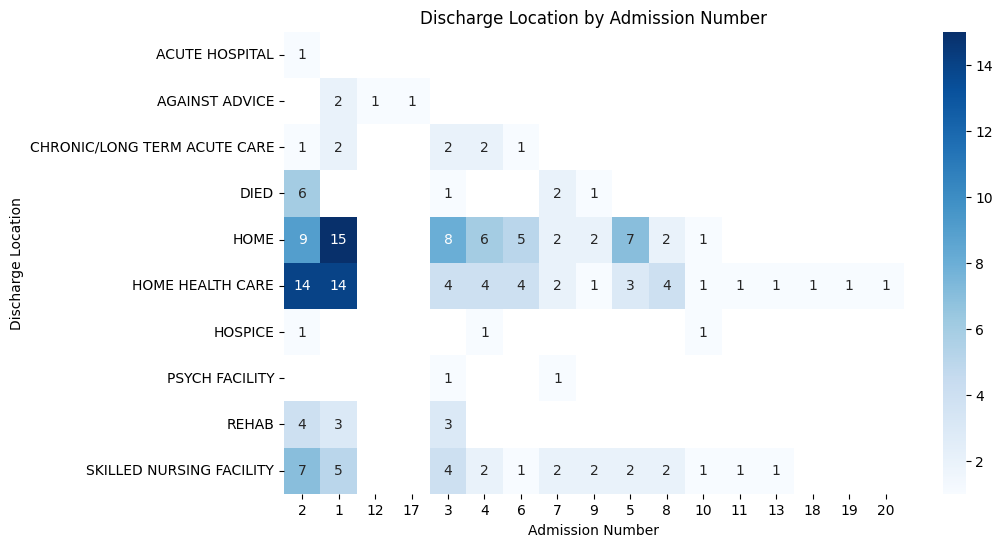

In [46]:
# Let’s track how discharge locations evolve across multiple admissions.

# Sort by patient and admission time
multi_admit_df['admission_number'] = multi_admit_df.groupby('subject_id').cumcount() + 1

# Sample progression for 3 patients
for patient in multi_admit_patients[:3]:
    patient_data = multi_admit_df[multi_admit_df['subject_id'] == patient]
    discharge_seq = patient_data['discharge_location'].tolist()
    print(f"Patient {patient} Discharge Locations: {discharge_seq}")

# Visualize discharge location transitions (simplified)
transition_counts = multi_admit_df.groupby(['discharge_location', 'admission_number'])['subject_id'].count().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(transition_counts, cmap='Blues', annot=True, fmt='.0f')
plt.title('Discharge Location by Admission Number')
plt.xlabel('Admission Number')
plt.ylabel('Discharge Location')
plt.show()

## Final Insights

### Summary of Insights from admissions_df

The admissions_df dataset, encompassing 275 hospital admissions for 100 unique patients, provides a detailed snapshot of patient admissions, including admission and discharge timestamps, admission types, discharge locations, demographic details, and patient outcomes. Below are the key insights derived from the data exploration so far:


**Patient Outcomes:**
Admissions lead to a range of outcomes, from discharges to home or skilled nursing facilities to in-hospital deaths, as indicated by the hospital_expire_flag. This variability highlights differences in patient severity and care trajectories.

**Length of Stay (LOS):**
The length of stay varies widely, with some patients discharged on the same day and others staying for several weeks. Factors such as admission type and the time of day of admission appear to influence LOS, with certain admission periods potentially associated with longer stays.

**Admission Types:**
Emergency admissions dominate the dataset, reflecting a focus on acute care, followed by elective and other admission categories. This distribution suggests a significant burden of urgent healthcare needs.

**Discharge Locations:**
The most common discharge destination is home, followed by skilled nursing facilities and rehabilitation centers. These patterns indicate a spectrum of post-hospital care requirements among patients.

**Readmissions:**
Some patients experience readmissions within 30 days, pointing to potential gaps in care continuity or challenges in managing chronic conditions. This finding is critical for identifying opportunities to improve patient outcomes.

**Demographic Influences:**
Demographic factors, including insurance type and language, show correlations with differences in LOS and patient outcomes. These associations suggest possible disparities in healthcare access or quality that warrant further investigation.

**Temporal Patterns:**
The time of day of admission appears to affect LOS and discharge locations. This insight hints at operational or staffing factors that may influence patient flow and hospital processes.

## **Conclusion**
These findings from **admissions_df** illuminate key aspects of hospital admissions, including outcome variability, readmission rates, and demographic disparities. They provide a solid foundation for deeper analysis and potential strategies to enhance healthcare delivery, such as improving care transitions or addressing inequities in patient care.